In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv("../../datasets/medical_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [100]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [101]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [102]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Discover and Visualize

In [103]:
insurances = data.copy()
insurances

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

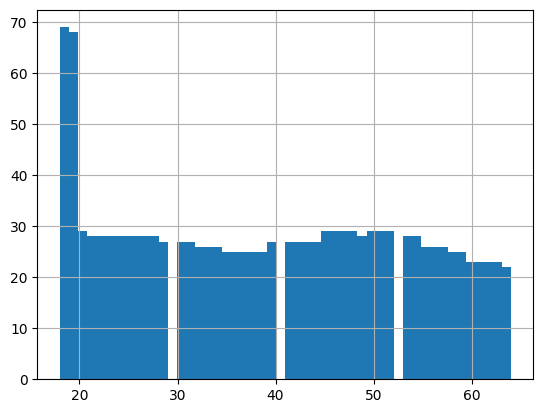

In [104]:
insurances["age"].hist(bins=50)

<Axes: >

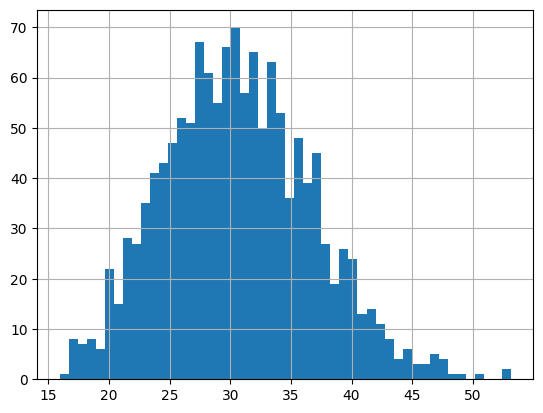

In [105]:
insurances["bmi"].hist(bins=50)

<Axes: >

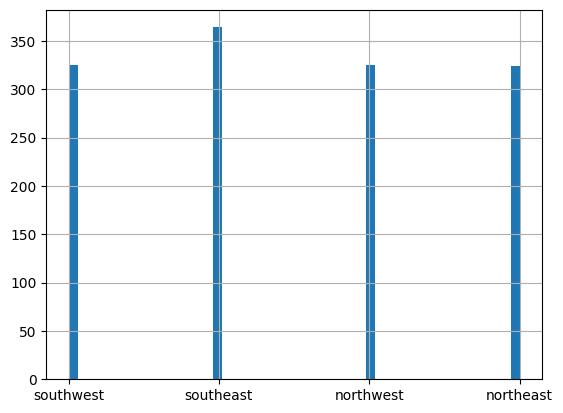

In [106]:
insurances["region"].hist(bins=50)

<Axes: >

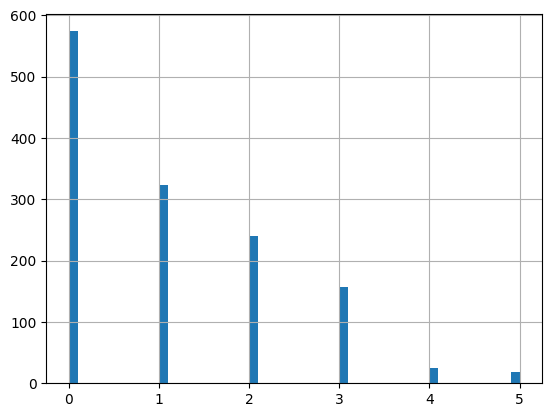

In [107]:
insurances["children"].hist(bins=50)

In [108]:
corr_matrix = insurances.corr(numeric_only=True)
corr_matrix["charges"]

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["charges", "sex", "smoker", "region"])
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## From Scratch

In [110]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

n_features = X_train_scaled.shape[1]
m = y_train.shape[0]

b = 0
w = np.zeros(n_features)

lr = 0.01
epoches = 1000
losses = []

for epoch in range(epoches):
    y_pred = b + X_train_scaled.dot(w)
    diff = y_pred - y_train

    mse = np.mean(diff ** 2)
    losses.append(mse)
    db = (2 / m) * np.sum(diff)
    dw = (2 / m) * X_train_scaled.T.dot(diff)

    b -= lr * db
    w -= lr * dw

    if epoch % 200 == 0:
        print(f"{epoch} Iteration:")
        print(f"MSE: {mse:.2f}")

    if epoch > 1 and abs(losses[-1] - losses[-2]) < 1e-6:
        print(f"Early stopping at {epoch}. iteration")
        break 


0 Iteration:
MSE: 322451733.18
200 Iteration:
MSE: 128532152.35
400 Iteration:
MSE: 128475024.60
600 Iteration:
MSE: 128475007.02
Early stopping at 737. iteration


In [111]:
y_pred_train = b + X_train_scaled.dot(w)
y_pred_test = b + X_test_scaled.dot(w)

diff_train = y_train - y_pred_train
diff_test = y_test - y_pred_test

train_mse = np.mean(diff_train ** 2)
test_mse = np.mean(diff_test ** 2)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

df = pd.DataFrame(
    columns= ["MSE", "RMSE"],
    index=["Train", "Test"],
    data=[[train_mse, train_rmse], [test_mse, test_rmse]]
)
df

,MSE,RMSE
Train,1.284750e+08,11334.681602
Test,1.312013e+08,11454.315171


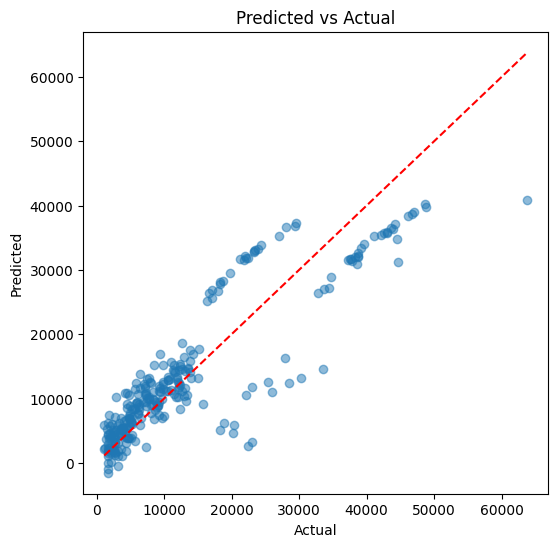

In [112]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, "--r")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## With Sklearn

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = data.drop(columns=["charges"])
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [114]:
from sklearn.linear_model import LinearRegression

num_features = ["age", "bmi", "children"]
cat_features = ["sex", "smoker", "region"]

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

In [115]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [116]:
from sklearn.metrics import mean_squared_error

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

df = pd.DataFrame(
    columns= ["MSE", "RMSE"],
    index=["Train", "Test"],
    data=[[train_mse, train_rmse], [test_mse, test_rmse]]
)
df


,MSE,RMSE
Train,1.284750e+08,11334.681602
Test,1.312013e+08,11454.315171


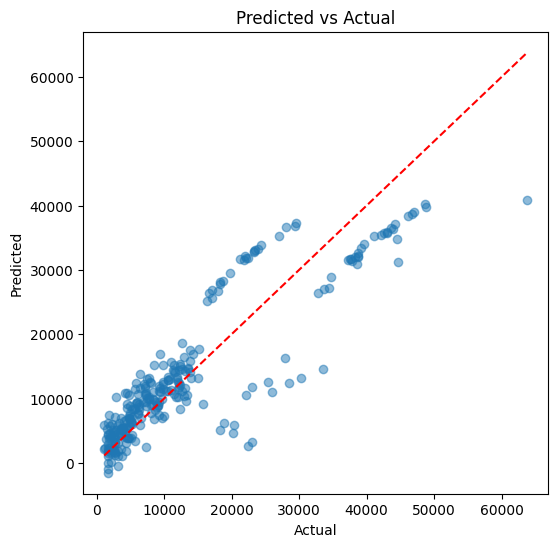

In [117]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, "--r")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()